# Wine quality DataBase analyse

This file make reference to [Wine quality UCI Database](https://archive.ics.uci.edu/dataset/186/wine+quality).

## Database informations
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**List variables :**

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)


In [6]:
a = 10
print(a)

10


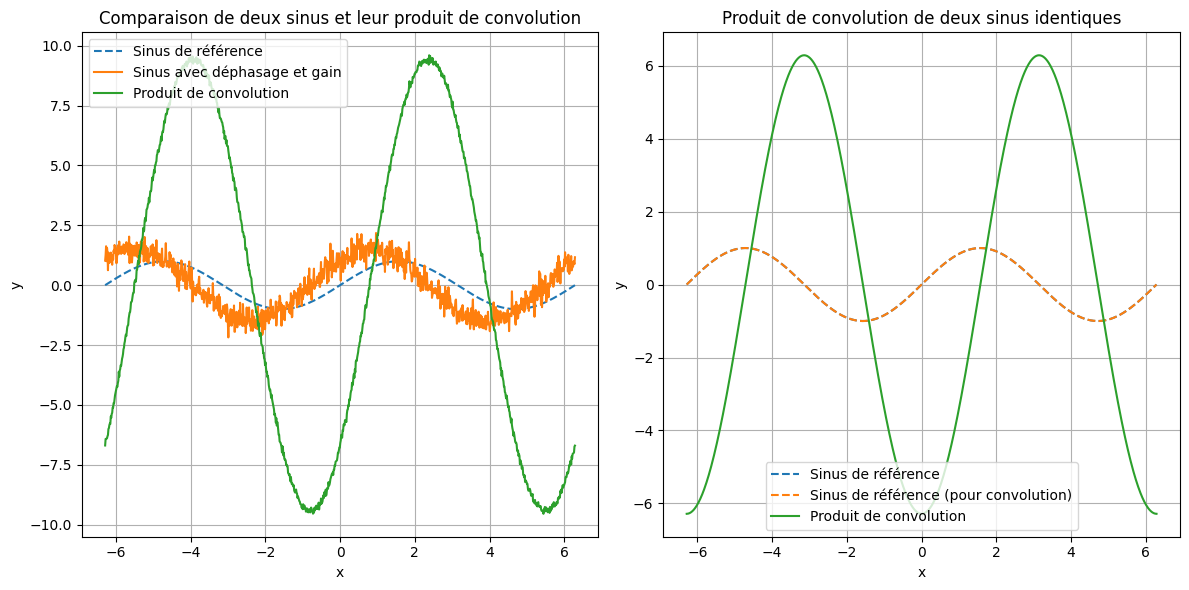

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction sinus de référence
def f(x):
    return np.sin(x)

# Définir la fonction sinus avec bruit, déphasage et gain
def g(x, phase_shift, gain, noise_intensity):
    return gain * np.sin(x + phase_shift) + noise_intensity * np.random.normal(0, 1, size=len(x))  

# Définir la fonction de convolution
def convolution(x, ref_func, noisy_func):
    result = np.zeros_like(x)
    for i, xi in enumerate(x):
        result[i] = np.trapz(ref_func(x) * noisy_func(xi - x), x)
    return result

# Définir la plage de valeurs de x
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Paramètres du bruit, du déphasage et du gain
phase_shift = np.pi / 4  # déphasage de pi/4
gain = 1.5  # gain de 1.5
noise_intensity = 0.3  # intensité du bruit

# Calculer le produit de convolution avec la fonction de référence
result_convolution = convolution(x, f, lambda x: g(x, phase_shift, gain, noise_intensity))

# Calculer le produit de convolution de deux sinus identiques (fonction de référence)
result_convolution_ref = convolution(x, f, f)

# Tracer les fonctions et leur produit de convolution
plt.figure(figsize=(12, 6))

# Tracer le premier graphique
plt.subplot(1, 2, 1)
plt.plot(x, f(x), '--', label='Sinus de référence')
plt.plot(x, g(x, phase_shift, gain, noise_intensity), label='Sinus avec déphasage et gain')
plt.plot(x, result_convolution, label='Produit de convolution')
plt.title('Comparaison de deux sinus et leur produit de convolution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Tracer le deuxième graphique
plt.subplot(1, 2, 2)
plt.plot(x, f(x), '--', label='Sinus de référence')
plt.plot(x, f(x), '--', label='Sinus de référence (pour convolution)')
plt.plot(x, result_convolution_ref, label='Produit de convolution')
plt.title('Produit de convolution de deux sinus identiques')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Pour éviter que les graphiques se chevauchent
plt.show()
